<a href="https://colab.research.google.com/github/AMINDARVAKH/6220/blob/main/Final%20Project-rv02_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [1]:
# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


**Dataset**

* The dataset was acquired and annotated by professional physicians at 'Hospital Universitario de Caracas'.
* The subjective judgments (target variables) were originally done in an ordinal manner (poor, fair, good, excellent) and was discretized in two classes (bad, good).
* Images were randomly sampled from the original colposcopic sequences (videos).
* The original images and the manual segmentations are included in the 'images' directory.
* The dataset has three modalities (i.e. Hinselmann, Green, Schiller).
* The target variables are expert::X (X in 0,...,5) and consensus

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1.	rgb_total_r_mean_plus_std: (avg + standard deviation) color information in the image (R channel).
2.	rgb_total_g_mean: average color information in the image (G channel).
3.	rgb_total_g_std: standard deviation color information in the image (G channel).
4.	rgb_total_g_mean_minus_std: (avg – standard deviation) color information in the image (G channel).
5.	rgb_total_g_mean_plus_std: (avg + standard deviation) color information in the image (G channel).
6.	rgb_total_b_mean: average color information in the image (B channel).
7.	rgb_total_b_std: standard deviation color information in the image (B channel).


https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [12]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/AMINDARVAKH/6220/main/final%20data%20set-62200.csv')
df.head(25)

rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  \
0                  156.788989         80.899135        50.606873   
1                  132.521568         57.700443        45.906090   
2                  113.618903         45.707417        26.629182   
3                  153.217762         73.231090        52.571685   
4                  140.593984         79.204423        29.542995   
5                  153.003742         75.707518        39.582202   
6                   65.771822         24.730717        31.420602   
7                  181.179052         92.314395        69.278309   
8                  152.215822         86.793410        38.404915   
9                  152.252103         78.821219        50.367532   
10                 162.186087         75.366082        51.071916   
11                 130.180669         58.072018        70.267440   
12                 144.283752         55.656005        34.949396   
13                 134.198611         67.992139        67.387539   
14                 174.078851         75.715903        64.323817   
15                 138.972383         60.249786        54.838376   
16                  62.894480         36.798932        23.759897   
17                 120.615190         79.003827        61.649653   
18                 145.717686         60.074583        41.864267   
19                  93.650434         51.919502        28.298344   
20                  46.712868         26.245696        17.873769   
21                  66.187850         26.864441        28.002905   
22                  32.447633          8.673494        15.273818   
23                 176.314285         83.188469        46.010217   
24                  46.971627         12.440307        27.781483   

    rgb_total_g_mean_minus_std  rgb_total_g_mean_plus_std  rgb_total_b_mean  \
0                    30.292263                 131.506008        113.311732   
1                    11.794354                 103.606533         84.187332   
2                    19.078235                  72.336599        121.205850   
3                    20.659405                 125.802776        106.884677   
4                    49.661428                 108.747418        115.341782   
5                    36.125316                 115.289720        127.803475   
6                    -6.689886                  56.151319         37.821543   
7                    23.036086                 161.592704        127.960289   
8                    48.388494                 125.198325        136.293257   
9                    28.453687                 129.188751        106.543973   
10                   24.294166                 126.437998        107.234442   
11                  -12.195422                 128.339458         79.304433   
12                   20.706610                  90.605401        163.244376   
13                    0.604599                 135.379678        105.053285   
14                   11.392086                 140.039720        101.015861   
15                    5.411410                 115.088162         87.951738   
16                   13.039035                  60.558829        116.342776   
17                   17.354173                 140.653480        140.017566   
18                   18.210316                 101.938850         98.303270   
19                   23.621159                  80.217846         79.428515   
20                    8.371927                  44.119465         81.407686   
21                   -1.138463                  54.867346        109.615583   
22                   -6.600323                  23.947312         73.420415   
23                   37.178252                 129.198686        122.813748   
24                  -15.341175                  40.221790         46.139333   

    rgb_total_b_std  class  
0         61.088989      1  
1         57.111269      1  
2         79.048550      1  
3         59.211378      1  
4         41.612120      1  
5     

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rgb_total_r_mean_plus_std   92 non-null     float64
 1   rgb_total_g_mean            92 non-null     float64
 2   rgb_total_g_std             92 non-null     float64
 3   rgb_total_g_mean_minus_std  92 non-null     float64
 4   rgb_total_g_mean_plus_std   92 non-null     float64
 5   rgb_total_b_mean            92 non-null     float64
 6   rgb_total_b_std             92 non-null     float64
 7   class                       92 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 5.9 KB


In [14]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [15]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

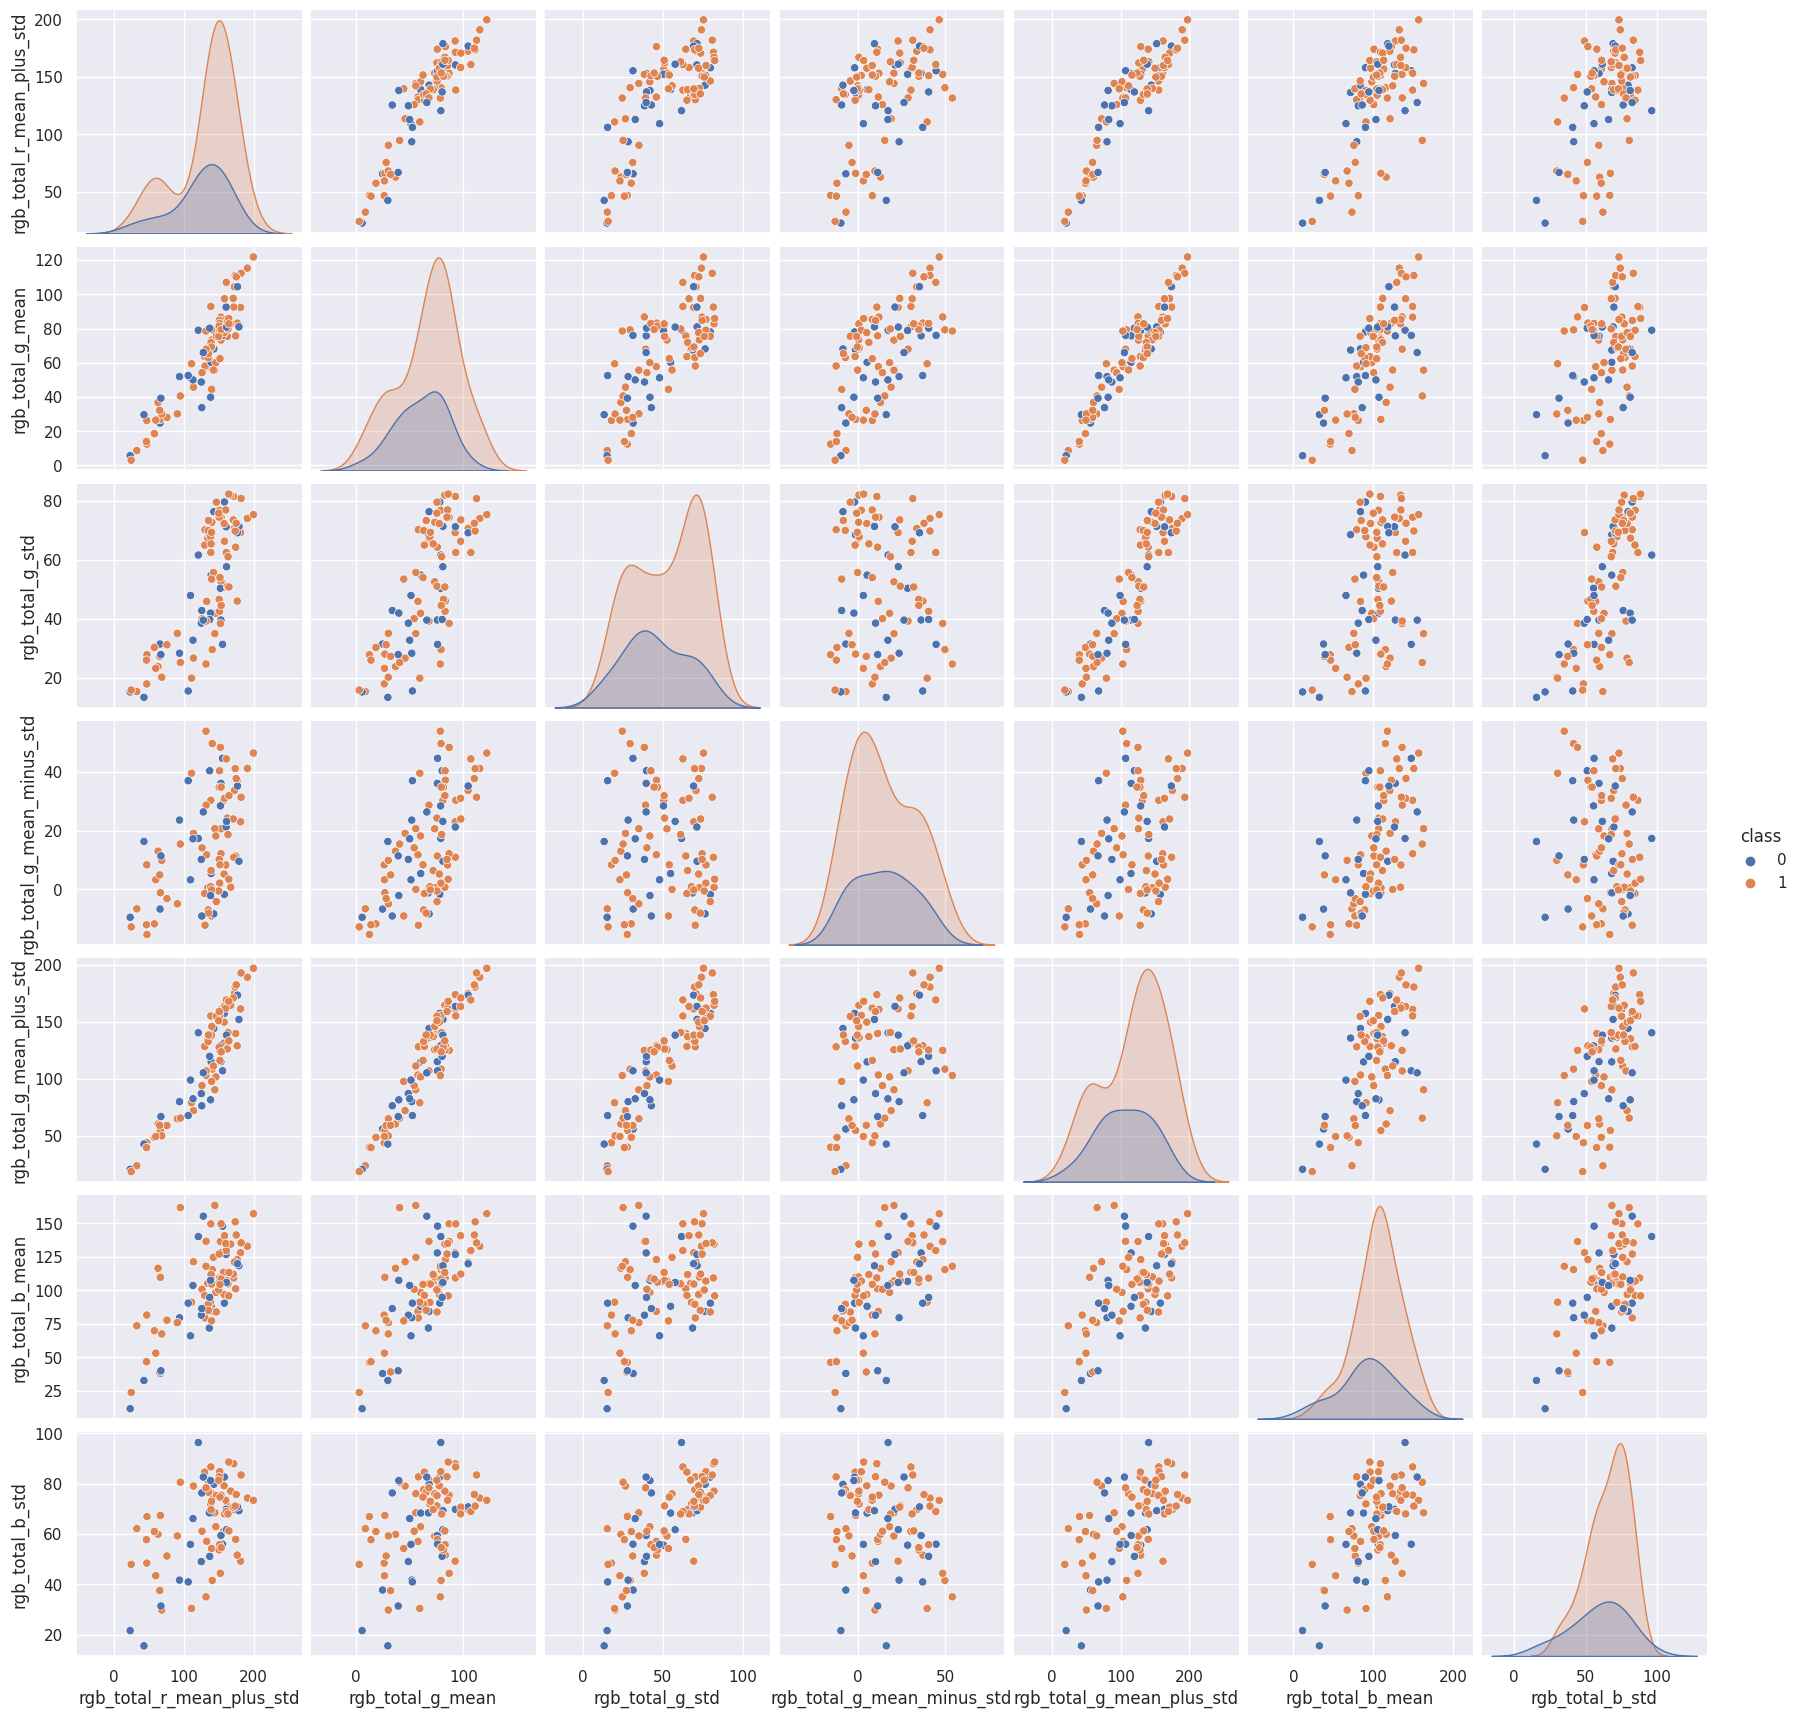

In [16]:
sns.pairplot(df, hue='class')
plt.show()

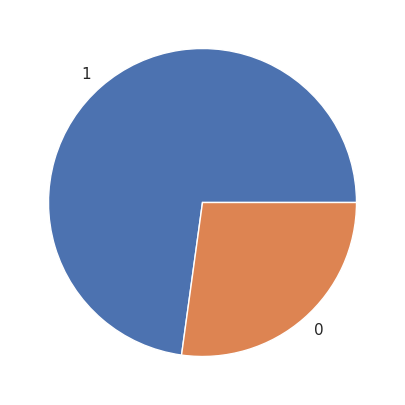

In [17]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [18]:
X = df.drop(columns=['class'])
X.head(10)

rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  \
0                 156.788989         80.899135        50.606873   
1                 132.521568         57.700443        45.906090   
2                 113.618903         45.707417        26.629182   
3                 153.217762         73.231090        52.571685   
4                 140.593984         79.204423        29.542995   
5                 153.003742         75.707518        39.582202   
6                  65.771822         24.730717        31.420602   
7                 181.179052         92.314395        69.278309   
8                 152.215822         86.793410        38.404915   
9                 152.252103         78.821219        50.367532   

   rgb_total_g_mean_minus_std  rgb_total_g_mean_plus_std  rgb_total_b_mean  \
0                   30.292263                 131.506008        113.311732   
1                   11.794354                 103.606533         84.187332   
2                   19.078235                  72.336599        121.205850   
3                   20.659405                 125.802776        106.884677   
4                   49.661428                 108.747418        115.341782   
5                   36.125316                 115.289720        127.803475   
6                   -6.689886                  56.151319         37.821543   
7                   23.036086                 161.592704        127.960289   
8                   48.388494                 125.198325        136.293257   
9                   28.453687                 129.188751        106.543973   

   rgb_total_b_std  
0        61.088989  
1        57.111269  
2        79.048550  
3        59.211378  
4        41.612120  
5        59.442568  
6        37.800638  
7        49.248360  
8        44.421120  
9        55.605182

In [19]:
X.describe().transpose()

count        mean        std        min  \
rgb_total_r_mean_plus_std    92.0  130.517280  41.555728  22.931591   
rgb_total_g_mean             92.0   65.658342  26.870372   3.018454   
rgb_total_g_std              92.0   50.908293  20.649095  13.311455   
rgb_total_g_mean_minus_std   92.0   14.750048  17.836053 -15.341175   
rgb_total_g_mean_plus_std    92.0  116.566635  44.482347  18.806855   
rgb_total_b_mean             92.0  102.445177  31.724405  11.541144   
rgb_total_b_std              92.0   64.261232  16.249795  15.666567   

                                   25%         50%         75%         max  
rgb_total_r_mean_plus_std   113.449202  139.810520  157.977283  199.569888  
rgb_total_g_mean             49.660375   70.548018   81.745137  121.829227  
rgb_total_g_std              31.393393   50.938773   70.061493   82.369730  
rgb_total_g_mean_minus_std   -0.032870   11.614346   30.309869   53.892903  
rgb_total_g_mean_plus_std    81.396595  126.120387  151.508462  197.218752  
rgb_total_b_mean             84.168348  105.870550  123.236386  163.244376  
rgb_total_b_std              55.357661   68.160871   76.104892   96.305186

**Standardize the Data**

In [20]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  \
0                   0.635668          0.570305        -0.014677   
1                   0.048496         -0.297782        -0.243575   
2                  -0.408872         -0.746556        -1.182238   
3                   0.549259          0.283369         0.080997   
4                   0.243815          0.506889        -1.040354   
5                   0.544081          0.376037        -0.551509   
6                  -1.566577         -1.531497        -0.948927   
7                   1.225809          0.997460         0.894503   
8                   0.525016          0.790867        -0.608835   
9                   0.525894          0.492550        -0.026332   

   rgb_total_g_mean_minus_std  rgb_total_g_mean_plus_std  rgb_total_b_mean  \
0                    0.876168                   0.337690          0.344407   
1                   -0.166623                  -0.292950         -0.578668   
2                    0.243995                  -0.999776          0.594604   
3                    0.333131                   0.208774          0.140706   
4                    1.968074                  -0.176746          0.408747   
5                    1.204997                  -0.028863          0.803711   
6                   -1.208643                  -1.365628         -2.048194   
7                    0.467112                   1.017770          0.808681   
8                    1.896315                   0.195111          1.072788   
9                    0.772521                   0.285310          0.129908   

   rgb_total_b_std  
0        -0.196287  
1        -0.442414  
2         0.914987  
3        -0.312467  
4        -1.401447  
5        -0.298162  
6        -1.637287  
7        -0.928943  
8        -1.227636  
9        -0.535606

In [21]:
X.describe().transpose()

count          mean       std       min       25%  \
rgb_total_r_mean_plus_std    92.0 -5.551115e-16  1.005479 -2.603136 -0.412978   
rgb_total_g_mean             92.0  1.098155e-16  1.005479 -2.343962 -0.598638   
rgb_total_g_std              92.0  3.282399e-16  1.005479 -1.830727 -0.950251   
rgb_total_g_mean_minus_std   92.0  1.915738e-16  1.005479 -1.696345 -0.833364   
rgb_total_g_mean_plus_std    92.0  6.323444e-16  1.005479 -2.209763 -0.794984   
rgb_total_b_mean             92.0 -1.182629e-16  1.005479 -2.881130 -0.579269   
rgb_total_b_std              92.0 -1.206764e-16  1.005479 -3.006865 -0.550921   

                                 50%       75%       max  
rgb_total_r_mean_plus_std   0.224859  0.664420  1.670792  
rgb_total_g_mean            0.182970  0.601962  2.101894  
rgb_total_g_std             0.001484  0.932639  1.531972  
rgb_total_g_mean_minus_std -0.176770  0.877160  2.206617  
rgb_total_g_mean_plus_std   0.215953  0.789825  1.823061  
rgb_total_b_mean            0.108564  0.658961  1.926982  
rgb_total_b_std             0.241296  0.732844  1.982766

**Observations and variables**

In [22]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

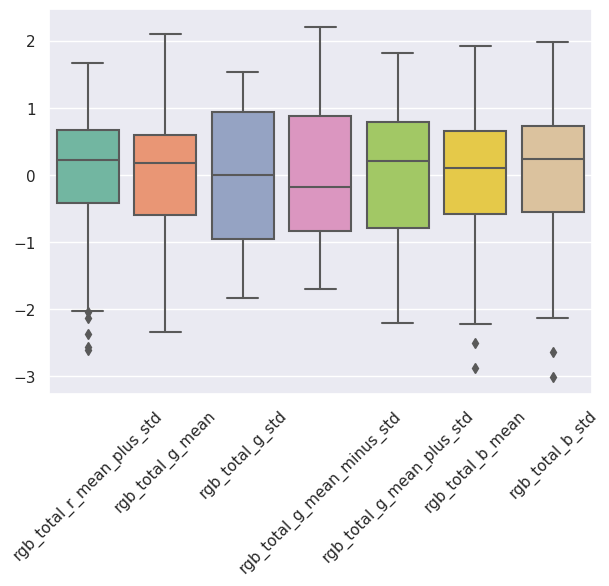

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


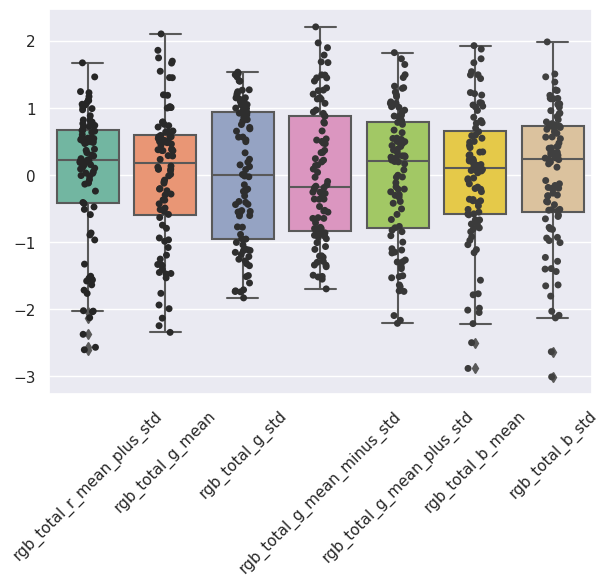

In [24]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

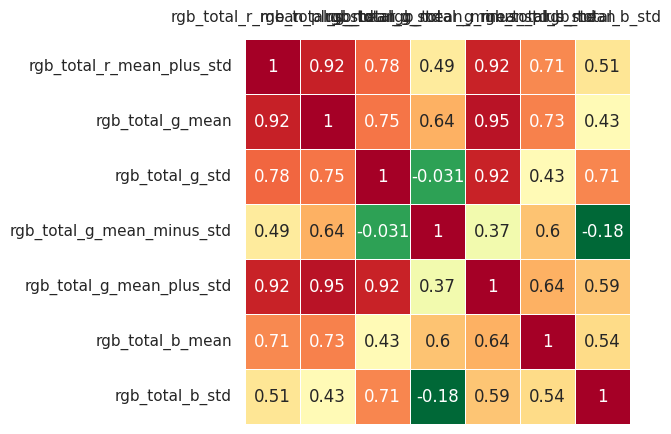

In [25]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

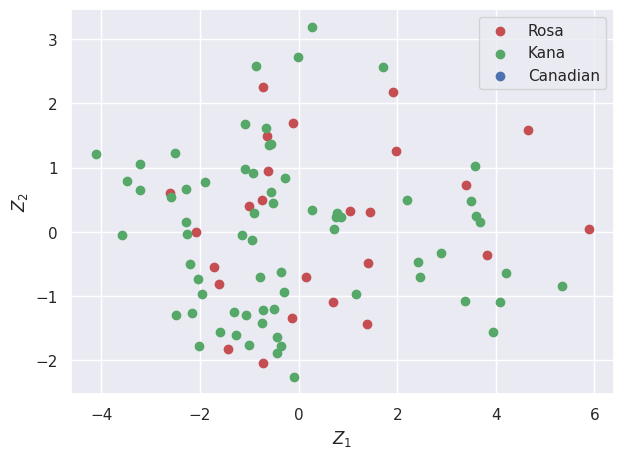

In [26]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[-4.35869941e-01  5.73119281e-02 -1.66907420e-01  6.72338675e-01
  -5.71695160e-01  2.39115466e-10  9.12178770e-11]
 [-4.40579640e-01  1.71283074e-01 -2.16363628e-01 -2.83844772e-01
   8.24300521e-02 -4.69107836e-01  6.49856707e-01]
 [-3.85096681e-01 -3.93320203e-01 -3.20644855e-01 -2.39229162e-02
   3.19652578e-01 -3.79725758e-01 -5.89274905e-01]
 [-2.17909238e-01  7.13394714e-01  4.52597305e-02 -3.99921881e-01
  -2.45884571e-01 -8.30518560e-03 -4.70180172e-01]
 [-4.44905405e-01 -7.91160221e-02 -2.79544538e-01 -1.82566830e-01
   1.98178899e-01  7.97293679e-01  9.68088454e-02]
 [-3.66785851e-01  2.15624556e-01  6.61539052e-01  3.44085522e-01
   5.12782046e-01 -6.06304174e-11  1.53928814e-11]
 [-2.96058114e-01 -5.00990377e-01  5.51985563e-01 -3.93900419e-01
  -4.48901586e-01 -7.62714891e-12 -2.48259330e-11]]


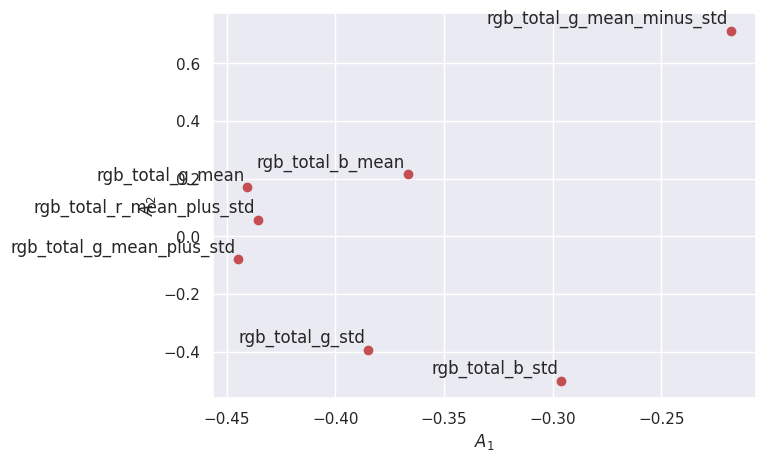

In [28]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


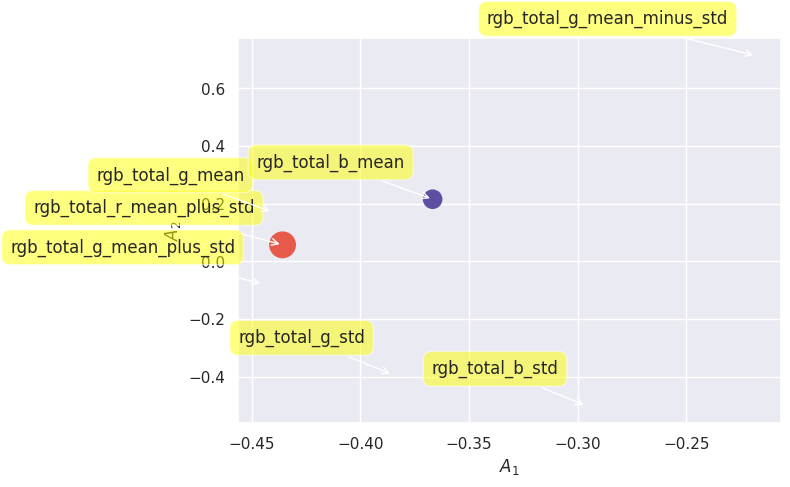

In [29]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.78826168e+00 1.49113698e+00 5.97430835e-01 1.14722994e-01
 8.53705888e-02 1.60337348e-19 6.27696301e-20]


Text(0, 0.5, 'Explained variance')

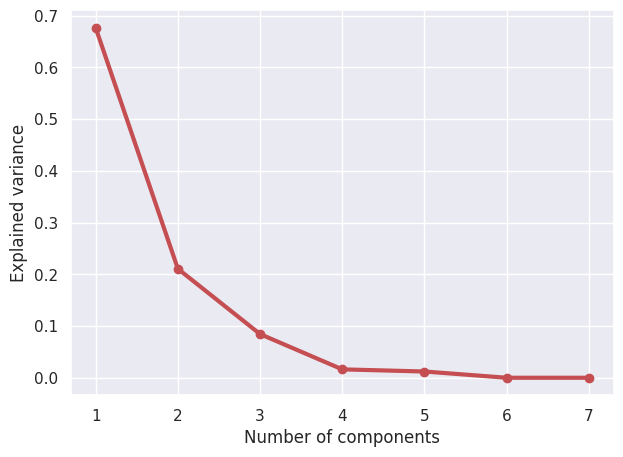

In [31]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print (Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

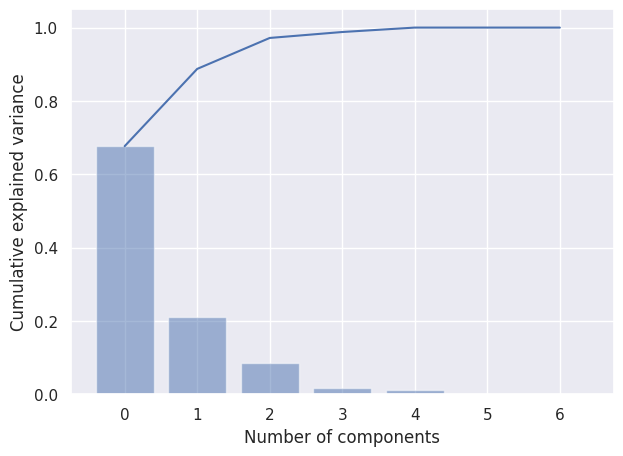

In [32]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

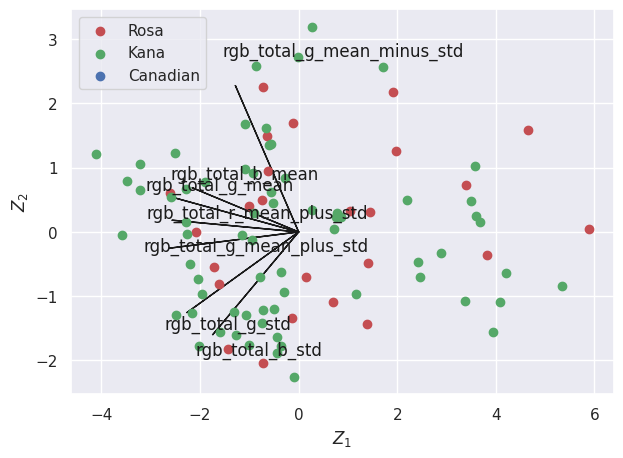

In [33]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [34]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [36]:
out['PC']

PC1       PC2       PC3
0  -0.932058  0.910825 -0.160038
1   0.713730  0.048757 -0.418230
2   0.865064  0.236667  1.797789
3  -0.520022  0.456177 -0.301636
4  -0.014200  2.718232 -0.181476
..       ...       ...       ...
87  1.048138  0.332860  0.788732
88  3.605794  0.249116 -1.002812
89 -0.360284 -0.616345  0.273511
90  1.919593  2.180995  0.074227
91  3.404180  0.728787 -1.298329

[92 rows x 3 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.79%] of the variance'}, xlabel='PC1 (67.6% expl.var)', ylabel='PC2 (21.0% expl.var)'>)

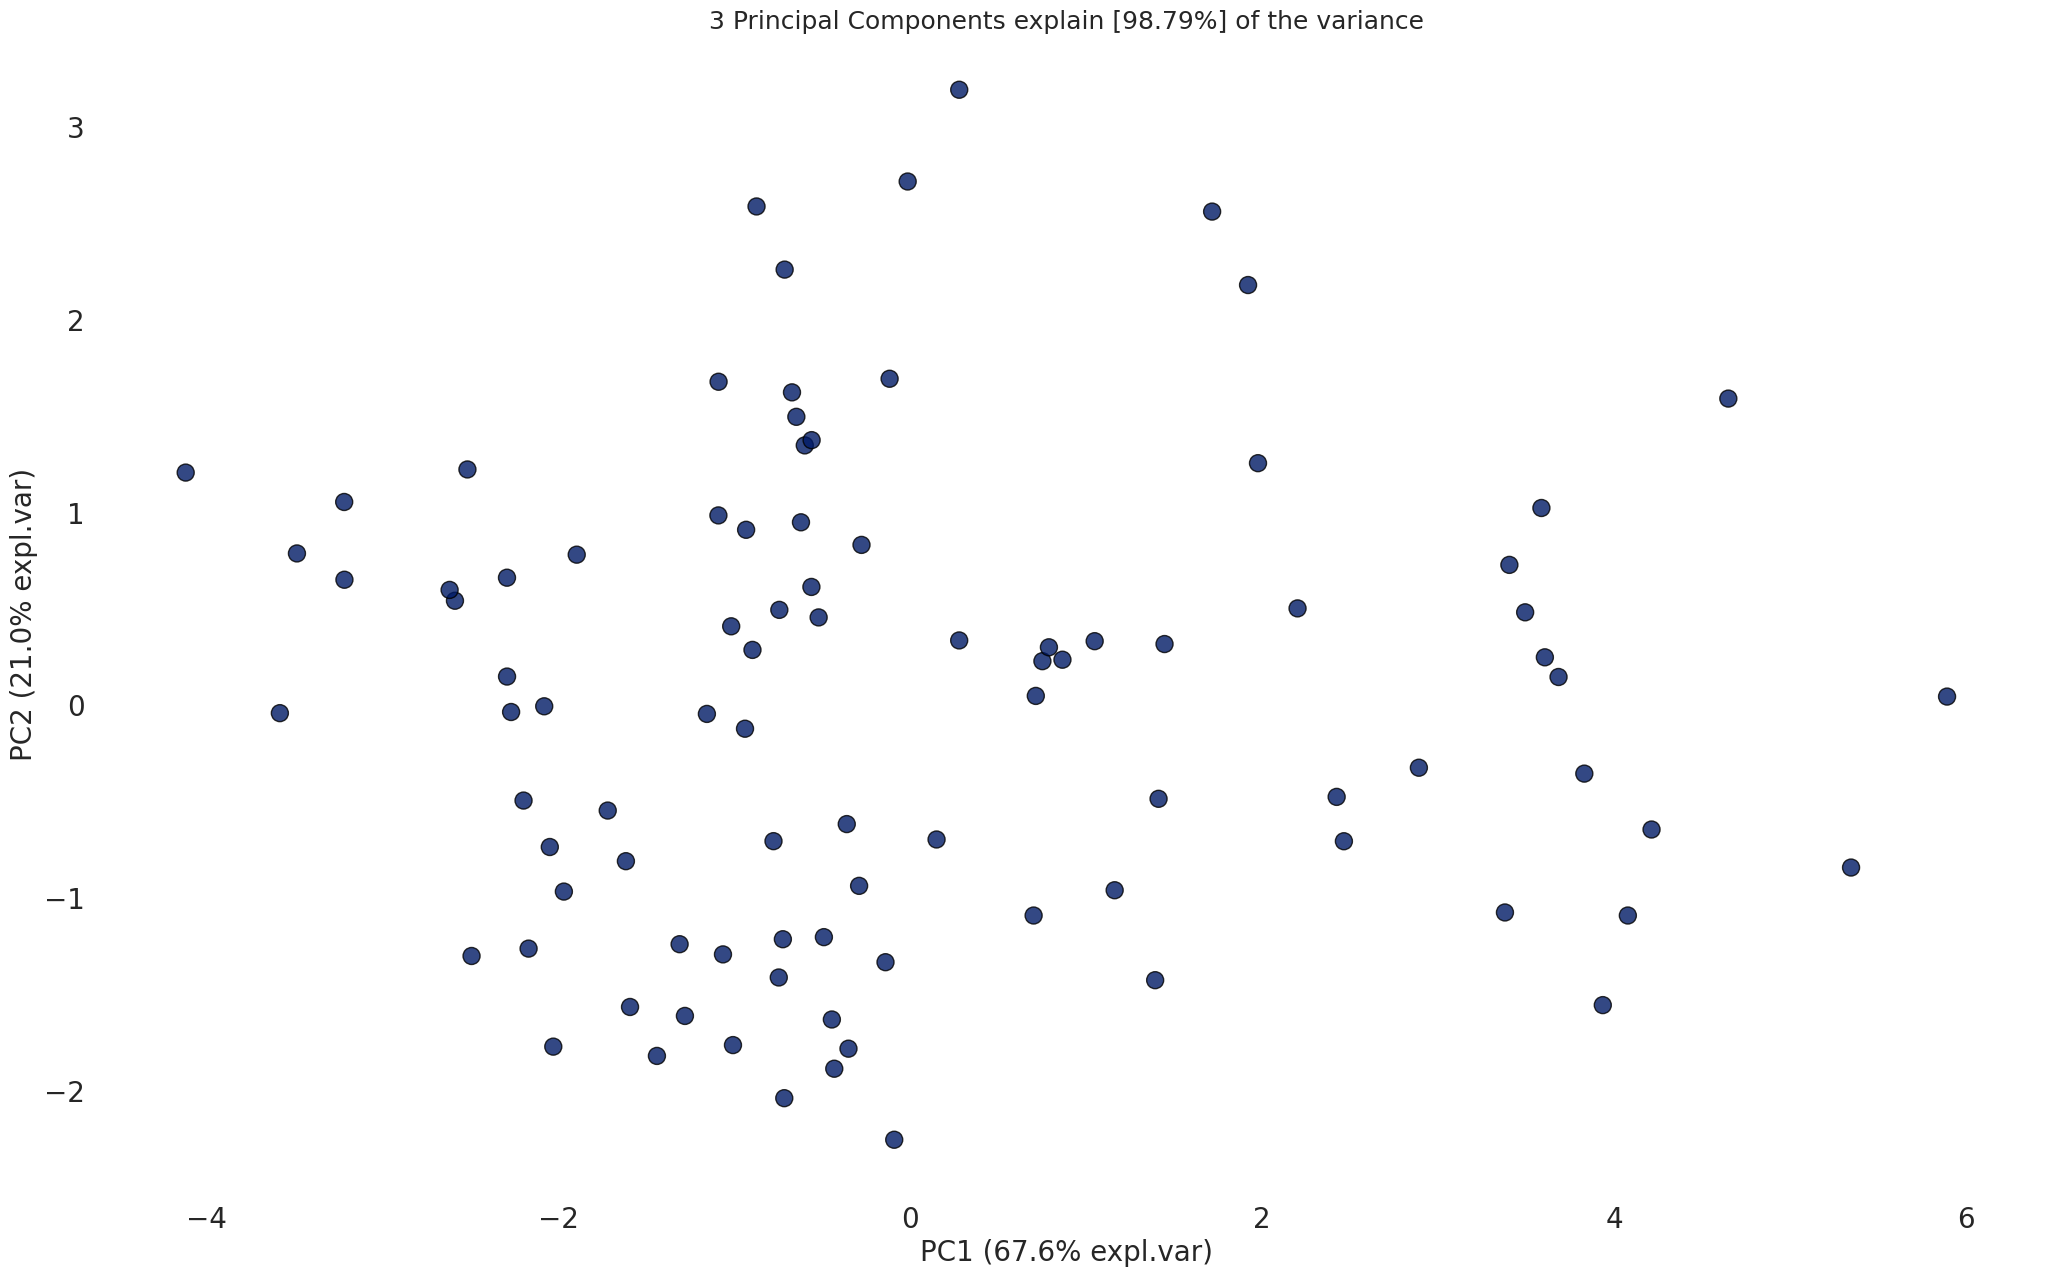

In [37]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [38]:
A = out['loadings'].T

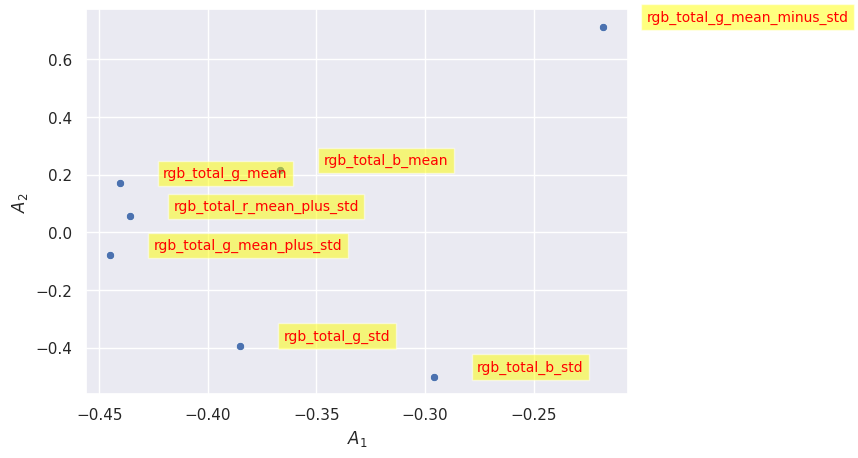

In [39]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

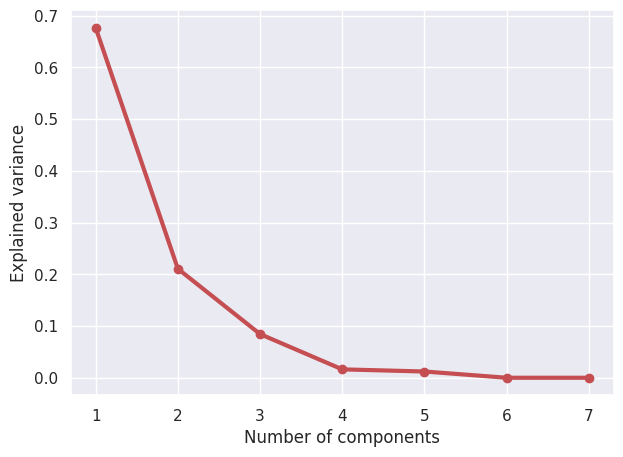

In [40]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

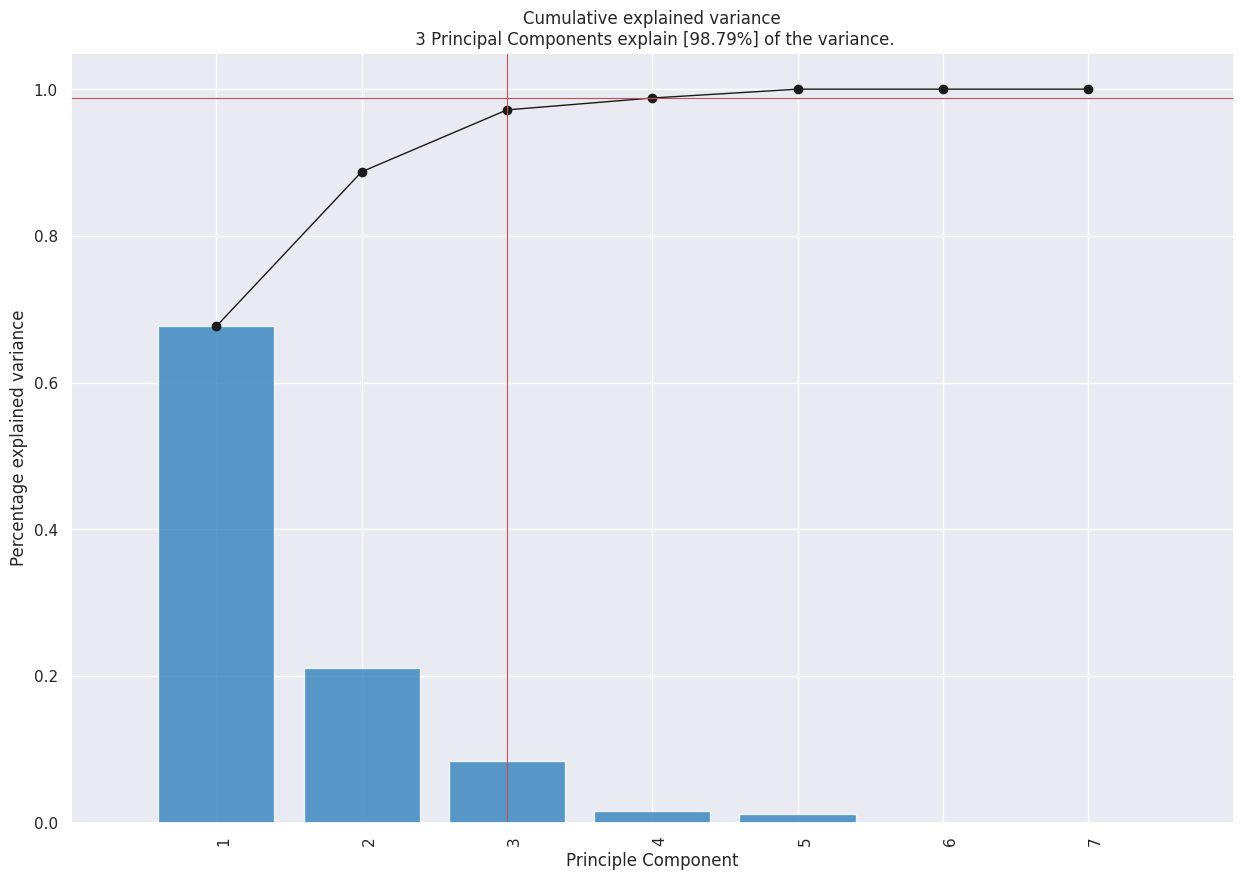

<Figure size 700x500 with 0 Axes>

In [41]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


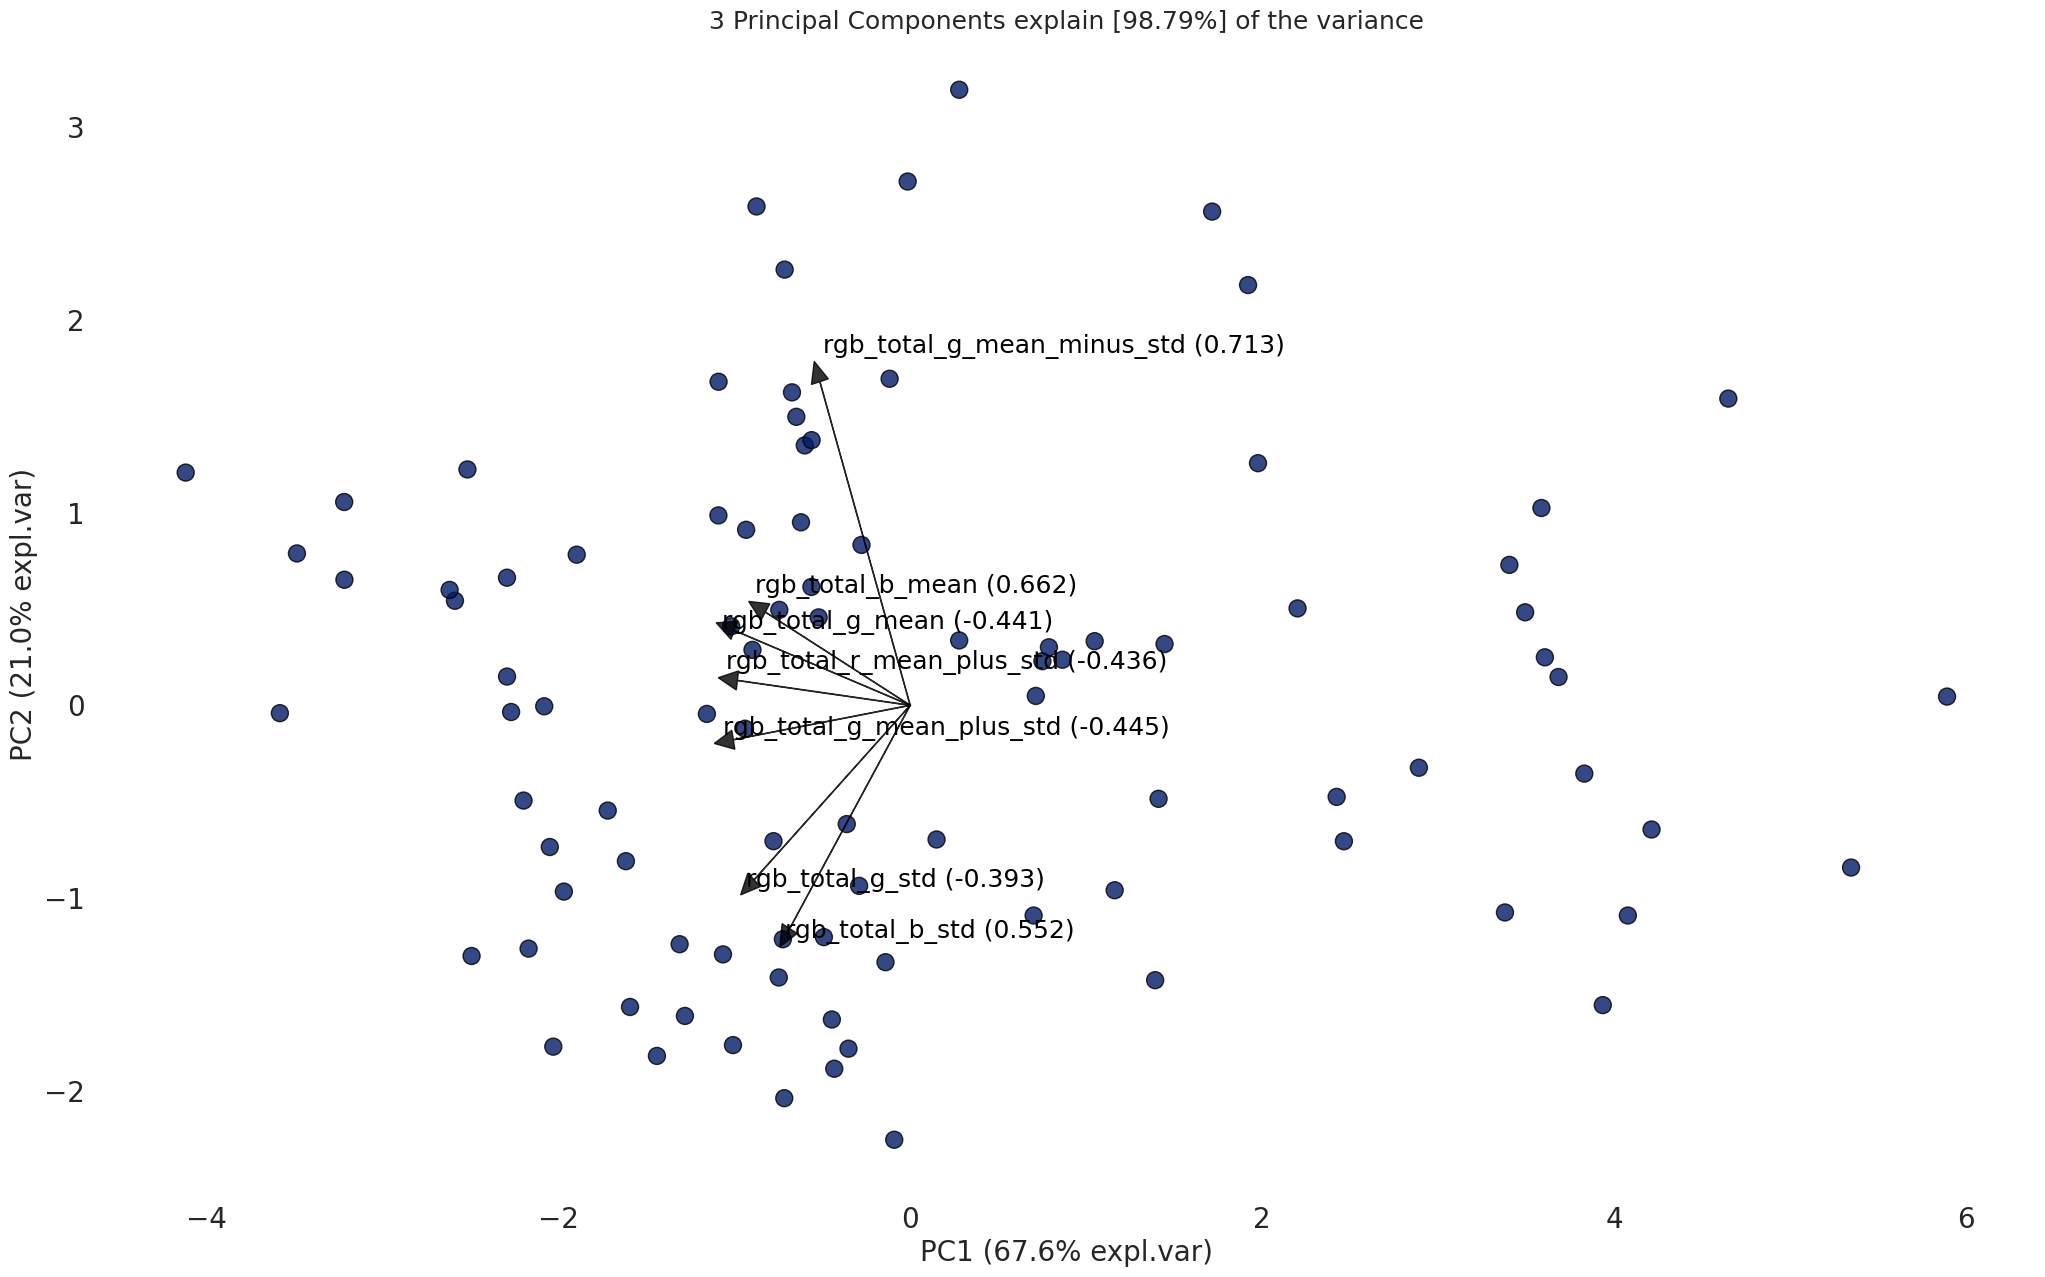

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.79%] of the variance'}, xlabel='PC1 (67.6% expl.var)', ylabel='PC2 (21.0% expl.var)'>)

In [42]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [43]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [44]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (83, 8)
Unseen Data For Predictions: (9, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [45]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (83, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (58, 7)
12                    Transformed Test Set           (25, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ae68
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [46]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7767  0.5562   1.000  0.7733   
svm                   SVM - Linear Kernel    0.7433  0.0000   0.975  0.7517   
lightgbm  Light Gradient Boosting Machine    0.7433  0.5400   0.975  0.7517   
dummy                    Dummy Classifier    0.7433  0.5000   1.000  0.7433   
xgboost         Extreme Gradient Boosting    0.7267  0.5225   0.880  0.7833   
ridge                    Ridge Classifier    0.7100  0.0000   0.955  0.7333   
rf               Random Forest Classifier    0.7067  0.5200   0.930  0.7450   
et                 Extra Trees Classifier    0.7033  0.5462   0.905  0.7533   
qda       Quadratic Discriminant Analysis    0.6900  0.5300   0.815  0.8000   
gbc          Gradient Boosting Classifier    0.6733  0.5675   0.855  0.7383   
lda          Linear Discriminant Analysis    0.6733  0.5850   0.910  0.7250   
lr                    Logistic Regression    0.6700  0.6100   0.885  0.7300   
dt               Decision Tree Classifier    0.6400  0.5700   0.740  0.7483   
nb                            Naive Bayes    0.6267  0.5400   0.845  0.7033   
ada                  Ada Boost Classifier    0.6167  0.6200   0.785  0.7233   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8685  0.1571  0.1632     0.012  
svm       0.8455  0.0250  0.0250     0.010  
lightgbm  0.8455  0.0250  0.0250     0.139  
dummy     0.8505  0.0000  0.0000     0.011  
xgboost   0.8233  0.1631  0.1729     0.039  
ridge     0.8263 -0.0486 -0.0516     0.010  
rf        0.8215  0.0264  0.0234     0.149  
et        0.8165  0.0586  0.0616     0.128  
qda       0.7883  0.1494  0.1640     0.011  
gbc       0.7853 -0.0021 -0.0082     0.050  
lda       0.8015 -0.0936 -0.0966     0.009  
lr        0.7925 -0.0478 -0.0492     0.459  
dt        0.7252  0.1024  0.1136     0.010  
nb        0.7587 -0.1390 -0.1596     0.009  
ada       0.7436 -0.0778 -0.0792     0.063

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [47]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Create a Model**

The create_model function is a highly detailed function in PyCaret and is frequently used as the basis for most of PyCaret's features. Its purpose is to train and assess a model using cross-validation, which can be specified with the fold parameter. The function outputs a score grid that displays Accuracy, Recall, Precision, F1, Kappa, and MCC by fold.

For the remainder of this tutorial, we will be working with a particular set of models as examples. Please note that these selections are only intended for demonstration purposes and do not necessarily indicate that they are the most effective or optimal models for this type of data.

* Quadratic Discriminant Analysis ('qda')
* Logistic Regression ('lr')
* Ridge Classifier ('ridge')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Quadratic Discriminant Analysis**

In [99]:
qda = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       0.8571  0.8000    1.00  0.8333  0.9091  0.5882  0.6455
2       0.7143  0.4000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.5714  0.2000    0.80  0.6667  0.7273 -0.2353 -0.2582
4       0.8333  0.4000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.2000    1.00  0.8333  0.9091  0.0000  0.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.8333  0.7500    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  0.5000    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.7500    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7976  0.6000    0.98  0.8014  0.8777  0.2924  0.3020
SD      0.1348  0.2855    0.06  0.1200  0.0835  0.4327  0.4440

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 14
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [100]:
#trained model object is stored in the variable 'qda'. 
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model(Quadratic Discriminant Analysis) function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model(Quadratic Discriminant Analysis) function is used. The tune_model(Quadratic Discriminant Analysis) function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Quadratic Discriminant Analysis**

In [101]:
tuned_qda = tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       0.8571  0.7000    1.00  0.8333  0.9091  0.5882  0.6455
2       0.5714  0.3000    0.80  0.6667  0.7273 -0.2353 -0.2582
3       0.5714  0.2000    0.80  0.6667  0.7273 -0.2353 -0.2582
4       0.8333  0.4000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.2000    1.00  0.8333  0.9091  0.0000  0.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.8333  0.7500    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  0.5000    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.8750    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7833  0.5925    0.96  0.7967  0.8671  0.2689  0.2762
SD      0.1496  0.2979    0.08  0.1242  0.0944  0.4539  0.4677

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 15
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [86]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [87]:
#Update statmodels
#!pip3 install statsmodels --upgrade

How to analyze model performance using various plots

In [88]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [89]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.6000    1.00  0.8333  0.9091  0.5882  0.6455
1       0.7143  0.4000    1.00  0.7143  0.8333  0.0000  0.0000
2       0.7143  0.3000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.7143  0.4000    1.00  0.7143  0.8333  0.0000  0.0000
4       0.8333  0.8000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.1000    1.00  0.8333  0.9091  0.0000  0.0000
6       0.8333  0.9000    0.80  1.0000  0.8889  0.5714  0.6325
7       0.6667  0.6250    1.00  0.6667  0.8000  0.0000  0.0000
8       0.6667  0.6875    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.1875    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7500  0.5000    0.98  0.7643  0.8516  0.1160  0.1278
SD      0.0755  0.2507    0.06  0.1029  0.0450  0.2320  0.2556

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [90]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.7143  0.8500     1.0  0.7143  0.8333    0.0  0.0
1       0.7143  0.1500     1.0  0.7143  0.8333    0.0  0.0
2       0.7143  0.3000     1.0  0.7143  0.8333    0.0  0.0
3       0.7143  0.0500     1.0  0.7143  0.8333    0.0  0.0
4       0.8333  0.3000     1.0  0.8333  0.9091    0.0  0.0
5       0.8333  0.9000     1.0  0.8333  0.9091    0.0  0.0
6       0.8333  0.9000     1.0  0.8333  0.9091    0.0  0.0
7       0.6667  0.6875     1.0  0.6667  0.8000    0.0  0.0
8       0.6667  0.2500     1.0  0.6667  0.8000    0.0  0.0
9       0.6667  0.8125     1.0  0.6667  0.8000    0.0  0.0
Mean    0.7357  0.5200     1.0  0.7357  0.8461    0.0  0.0
SD      0.0669  0.3223     0.0  0.0669  0.0435    0.0  0.0

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [91]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [92]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5714  0.7000    0.80  0.6667  0.7273 -0.2353 -0.2582
1       0.7143  0.6000    1.00  0.7143  0.8333  0.0000  0.0000
2       0.7143  0.3000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.7143  0.2000    1.00  0.7143  0.8333  0.0000  0.0000
4       0.8333  0.4000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.0000    1.00  0.8333  0.9091  0.0000  0.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.8333  0.5000    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  1.0000    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.5000    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7548  0.5200    0.98  0.7610  0.8534  0.1336  0.1374
SD      0.1152  0.3059    0.06  0.1012  0.0720  0.3469  0.3575

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [95]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [96]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5714  0.7000    0.80  0.6667  0.7273 -0.2353 -0.2582
1       0.7143  0.7000    1.00  0.7143  0.8333  0.0000  0.0000
2       0.7143  0.3000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.7143  0.2000    1.00  0.7143  0.8333  0.0000  0.0000
4       0.8333  0.4000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.0000    1.00  0.8333  0.9091  0.0000  0.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.8333  0.6250    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  1.0000    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.5000    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7548  0.5425    0.98  0.7610  0.8534  0.1336  0.1374
SD      0.1152  0.3111    0.06  0.1012  0.0720  0.3469  0.3575

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [97]:
tuned_lr

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [98]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.5500    1.00  0.7143  0.8333  0.0000  0.0000
1       0.8571  0.5000    1.00  0.8333  0.9091  0.5882  0.6455
2       0.7143  0.0000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.5714  0.8000    0.80  0.6667  0.7273 -0.2353 -0.2582
4       0.8333  0.3000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.0000    1.00  0.8333  0.9091  0.0000  0.0000
6       0.8333  0.8000    0.80  1.0000  0.8889  0.5714  0.6325
7       0.8333  1.0000    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  0.6250    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.8125    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7524  0.5388    0.96  0.7729  0.8499  0.1496  0.1652
SD      0.0936  0.3272    0.08  0.1020  0.0584  0.2882  0.3179

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [63]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.5     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.5     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.5     1.0  0.8333  0.9091    0.0  0.0
3       0.6667  0.5     1.0  0.6667  0.8000    0.0  0.0
4       0.6667  0.5     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.5     1.0  0.6667  0.8000    0.0  0.0
6       0.6667  0.5     1.0  0.6667  0.8000    0.0  0.0
7       0.6667  0.5     1.0  0.6667  0.8000    0.0  0.0
8       0.8000  0.5     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7433  0.5     1.0  0.7433  0.8505    0.0  0.0
SD      0.0775  0.0     0.0  0.0775  0.0510    0.0  0.0

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [64]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [65]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8333  0.6000   1.000  0.8333  0.9091  0.0000  0.0000
1       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
2       0.8333  0.8000   1.000  0.8333  0.9091  0.0000  0.0000
3       0.6667  0.3750   1.000  0.6667  0.8000  0.0000  0.0000
4       0.5000  0.5000   0.750  0.6000  0.6667 -0.2857 -0.3162
5       0.6667  0.4375   1.000  0.6667  0.8000  0.0000  0.0000
6       0.8333  0.6250   1.000  0.8000  0.8889  0.5714  0.6325
7       0.6667  0.1875   1.000  0.6667  0.8000  0.0000  0.0000
8       0.8000  0.1250   1.000  0.8000  0.8889  0.0000  0.0000
9       0.8000  0.7500   1.000  0.8000  0.8889  0.0000  0.0000
Mean    0.7600  0.5400   0.975  0.7667  0.8552  0.1286  0.1316
SD      0.1306  0.2588   0.075  0.1116  0.0865  0.3525  0.3642

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [66]:
tuned_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [67]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [68]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (92, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (64, 3)
12                    Transformed Test Set           (28, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f331
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [69]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.7976  0.6000   0.980  0.8014   
lr                    Logistic Regression    0.7548  0.5200   0.980  0.7610   
ridge                    Ridge Classifier    0.7548  0.0000   0.980  0.7610   
lda          Linear Discriminant Analysis    0.7548  0.5600   0.960  0.7681   
xgboost         Extreme Gradient Boosting    0.7548  0.5850   0.940  0.7881   
rf               Random Forest Classifier    0.7524  0.5388   0.960  0.7729   
gbc          Gradient Boosting Classifier    0.7524  0.5125   0.920  0.8014   
knn                K Neighbors Classifier    0.7500  0.5000   0.980  0.7643   
nb                            Naive Bayes    0.7405  0.4425   0.940  0.7648   
lightgbm  Light Gradient Boosting Machine    0.7381  0.5162   0.960  0.7514   
dummy                    Dummy Classifier    0.7357  0.5000   1.000  0.7357   
et                 Extra Trees Classifier    0.7095  0.6287   0.900  0.7600   
dt               Decision Tree Classifier    0.6643  0.5350   0.820  0.7633   
svm                   SVM - Linear Kernel    0.6310  0.0000   0.775  0.7314   
ada                  Ada Boost Classifier    0.5976  0.4625   0.770  0.7114   

              F1   Kappa     MCC  TT (Sec)  
qda       0.8777  0.2924  0.3020     0.009  
lr        0.8534  0.1336  0.1374     0.011  
ridge     0.8534  0.1336  0.1374     0.009  
lda       0.8504  0.1689  0.1762     0.010  
xgboost   0.8504  0.1689  0.1762     0.028  
rf        0.8499  0.1496  0.1652     0.160  
gbc       0.8438  0.1986  0.2135     0.047  
knn       0.8516  0.1160  0.1278     0.017  
nb        0.8395  0.1401  0.1416     0.010  
lightgbm  0.8413  0.0689  0.0762     0.022  
dummy     0.8461  0.0000  0.0000     0.012  
et        0.8178  0.0737  0.0790     0.134  
dt        0.7786  0.0398  0.0489     0.009  
svm       0.7405  0.0612  0.0552     0.010  
ada       0.7271 -0.0988 -0.0884     0.065

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [70]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [71]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       0.8571  0.7000    1.00  0.8333  0.9091  0.5882  0.6455
2       0.5714  0.3000    0.80  0.6667  0.7273 -0.2353 -0.2582
3       0.5714  0.2000    0.80  0.6667  0.7273 -0.2353 -0.2582
4       0.8333  0.4000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.2000    1.00  0.8333  0.9091  0.0000  0.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.8333  0.7500    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  0.5000    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.8750    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7833  0.5925    0.96  0.7967  0.8671  0.2689  0.2762
SD      0.1496  0.2979    0.08  0.1242  0.0944  0.4539  0.4677

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [72]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [73]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [74]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.0 MB/s eta 0:00:00


In [75]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [76]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.5500    1.00  0.7143  0.8333  0.0000  0.0000
1       0.8571  0.5000    1.00  0.8333  0.9091  0.5882  0.6455
2       0.7143  0.0000    1.00  0.7143  0.8333  0.0000  0.0000
3       0.5714  0.8000    0.80  0.6667  0.7273 -0.2353 -0.2582
4       0.8333  0.3000    1.00  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.0000    1.00  0.8333  0.9091  0.0000  0.0000
6       0.8333  0.8000    0.80  1.0000  0.8889  0.5714  0.6325
7       0.8333  1.0000    1.00  0.8000  0.8889  0.5714  0.6325
8       0.6667  0.6250    1.00  0.6667  0.8000  0.0000  0.0000
9       0.6667  0.8125    1.00  0.6667  0.8000  0.0000  0.0000
Mean    0.7524  0.5388    0.96  0.7729  0.8499  0.1496  0.1652
SD      0.0936  0.3272    0.08  0.1020  0.0584  0.2882  0.3179

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [78]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5714  0.1000  0.8000  0.6667  0.7273 -0.2353 -0.2582
1       0.8571  0.8000  0.8000  1.0000  0.8889  0.6957  0.7303
2       0.5714  0.5000  0.8000  0.6667  0.7273 -0.2353 -0.2582
3       0.8571  0.8000  1.0000  0.8333  0.9091  0.5882  0.6455
4       0.8333  0.7000  1.0000  0.8333  0.9091  0.0000  0.0000
5       0.8333  1.0000  1.0000  0.8333  0.9091  0.0000  0.0000
6       0.6667  0.8000  0.6000  1.0000  0.7500  0.3333  0.4472
7       0.8333  0.8750  1.0000  0.8000  0.8889  0.5714  0.6325
8       0.8333  0.6875  1.0000  0.8000  0.8889  0.5714  0.6325
9       0.8333  0.6875  1.0000  0.8000  0.8889  0.5714  0.6325
Mean    0.7690  0.6950  0.9000  0.8233  0.8487  0.2861  0.3204
SD      0.1117  0.2347  0.1342  0.1065  0.0753  0.3483  0.3817

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


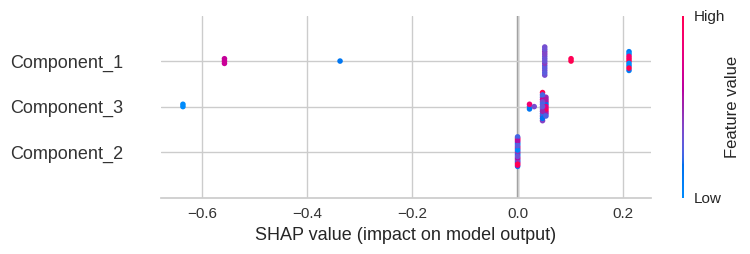

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [79]:
interpret_model(tuned_rf_pca, plot='summary')

In [80]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [81]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


IndexError: ignored

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [82]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
